# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
#pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import csv
from itertools import islice
from decimal import Decimal
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
import openpyxl
import pytest
pd.set_option('mode.chained_assignment', None)

In [2]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/vivaanwadhwa/Documents/GitHub/CFFS_sharon_2024


***
## Import Cleaned Datasets

In [3]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Items_List.csv"))
Items.dtypes

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

In [4]:
Items.head()

,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-7631,5 SPICE POWDER,1.0,ea,1.0,lb,SPICES
1,I-3617,ALLSPICE GROUND SHAKER,8.0,each,454.0,g,SPICES
2,I-44059,ALMOND BUTTER*,10.0,Kg,1.0,Kg,FOOD - GROCERY
3,I-43652,ANCHO CHILLI,1.2,Kg,1.0,Kg,FOOD - GROCERY
4,I-2853,ANCHOVIES FILLET*,1.7,Kg,1.0,Kg,FOOD - GROCERY


In [5]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Ingredients_List.csv"))
Ingredients.dtypes

IngredientId     object
Qty             float64
Uom              object
Conversion      float64
InvFactor       float64
Recipe           object
dtype: object

In [6]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-48933,1.00,Kg,1.000000,1.0000,P-10113
1,P-18746,1.00,Kg,1.000000,1.0000,P-10241
2,I-3388,1.00,L,1.000000,0.3058,P-10496
3,I-4658,2.27,Kg,2.204620,0.6942,P-10496
4,I-12176,4.00,g,0.001000,0.3636,P-12112
...,...,...,...,...,...,...
5107,I-7787,50.00,ml,0.001000,1.0000,R-73430
5108,I-8281,50.00,g,0.001000,1.0000,R-73430
5109,P-38661,25.00,mg,0.000001,1.0000,R-73430
5110,P-73445,150.00,g,0.001000,1.0000,R-73452


In [7]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-48933,1.00,Kg,1.00000,1.0000,P-10113
1,P-18746,1.00,Kg,1.00000,1.0000,P-10241
2,I-3388,1.00,L,1.00000,0.3058,P-10496
3,I-4658,2.27,Kg,2.20462,0.6942,P-10496
4,I-12176,4.00,g,0.00100,0.3636,P-12112


In [8]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_List_Cleaned.csv"))
Preps.dtypes

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

In [9]:
Preps.head()
Preps.shape

(776, 7)

In [10]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "Products_List.csv"))
Products.dtypes

ProdId         object
Description    object
SalesGroup     object
dtype: object

In [11]:
Products.head()

,ProdId,Description,SalesGroup
0,R-61778,ALF|Flatbread|4 Cheese,OK - AL FORNO
1,R-61780,ALF|Flatbread|Apple & Pancetta,OK - AL FORNO
2,R-61749,ALF|Flatbread|BBQ Chicken,OK - AL FORNO
3,R-61737,ALF|Flatbread|Beef & Onion,OK - AL FORNO
4,R-68122,ALF|Flatbread|Beef Onion|TMRW,OK - AL FORNO


In [12]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Conversions_Added.csv"))
Conversions.dtypes

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

In [13]:
Conversions

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,NaN,1.000000,1.0,XXX,1.00,L
1,NaN,0.877193,1.0,1.14L,1.14,L
2,NaN,0.666667,1.0,1.5L,1.50,L
3,NaN,0.571429,1.0,1.75 L,1.75,L
4,NaN,0.500000,1.0,2L,2.00,L
...,...,...,...,...,...,...
576,I-61327,0.002000,1.0,bottle,500.00,ml
577,I-64234,0.002415,1.0,414ML,414.00,ml
578,I-63697,0.008818,1.0,ea,113.40,g
579,I-13424,0.013333,2.0,CT,150.00,g


In [14]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "Mapping.csv"))
mapping.dtypes

ItemId                                                     object
CategoryID                                                float64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Food Category_y                                            object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

In [15]:
mapping

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-57545,1.0,CHUCK FLAT BONELESS FZN,3.300,Kg,1.0,Kg,MEAT,beef & buffalo meat,41.3463,329.50,0.12645,1677.200,61309.000
1,I-10869,1.0,BEEF STIRFRY COV FR,5.000,Kg,1.0,Kg,MEAT,beef & buffalo meat,41.3463,329.50,0.12645,1677.200,61309.000
2,I-7064,1.0,BEEF OUTSIDE FLAT AAA,1.000,Kg,1.0,Kg,MEAT,beef & buffalo meat,41.3463,329.50,0.12645,1677.200,61309.000
3,I-37005,1.0,BEEF MEATBALLS,4.540,Kg,1000.0,g,MEAT,beef & buffalo meat,41.3463,329.50,0.12645,1677.200,61309.000
4,I-37002,1.0,BEEF INSIDE ROUND SHAVED,9.000,Kg,1000.0,g,MEAT,beef & buffalo meat,41.3463,329.50,0.12645,1677.200,61309.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,I-09837,55.0,WATER FOR RECIPES,1.000,L,1.0,L,BEVERAGE,water & beverages,0.0000,0.00,0.00000,1.000,1.000
2879,I-72924,20.0,WAYGU TERIYAKI*STRIP PLNTBASED,6.000,bag,1.0,Kg,MEAT,soybeans/tofu,1.7542,5.90,0.00414,6.600,32.400
2880,I-73324,20.0,WAYGU UMAMI* STRIP PLNTBASED,6.000,bag,1.0,Kg,MEAT,soybeans/tofu,1.7542,5.90,0.00414,6.600,32.400
2881,I-62559,54.0,YEAST FLAKE,3.307,lb,1.0,lb,FOOD - GROCERY,stimulants & spices misc.,9.3703,6.75,0.03100,24.900,220.300


In [16]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

False

In [17]:
mapping.loc[mapping["ItemId"] == 'I-62863']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
1988,I-62863,59.0,CK|G&G|HMR|Meat Ball & Pasta.,1.0,ea,1.0,ea,PRODUCTION FOOD,manually adjusted,0.0,0.0,0.0,0.0,0.0


### Unit Converter

In [18]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [19]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-54697,LEMON|Wedge 1/8,8.0,each,PREP,84.0,g
1,P-35132,MARINATED|Lemon & Herb Chx,185.0,ea,PREP,24050.0,g
2,P-51992,YIELD|Bread|Sourdough 5/8,36.0,slice,NaN,1620.0,g
3,P-26234,BATCH|Roasted Garlic Bread,16.0,ea,PREP,1280.0,g
4,P-26170,GRILLED|NaanBread,1.0,ea,PREP,125.0,g


In [20]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
470,P-73664,0.003433,2.0,ea,582.5,g
471,P-38874,0.011765,1.0,piece,85.0,g
472,P-72899,0.009524,50.0,PTN,5250.0,g
473,P-72896,0.008197,100.0,PTN,12200.0,g
474,P-72885,0.004854,45.0,PTN,9270.0,g


In [21]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
1051,P-73664,0.003433,2.0,ea,582.5,g
1052,P-38874,0.011765,1.0,piece,85.0,g
1053,P-72899,0.009524,50.0,PTN,5250.0,g
1054,P-72896,0.008197,100.0,PTN,12200.0,g
1055,P-72885,0.004854,45.0,PTN,9270.0,g


In [22]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [23]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [24]:
# Test the std_converter
std_converter(0.25,'lb')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)


(113.398, 'g')

In [25]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))

def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit: #convert to std uom for ingredients has no specific convention instruction
        return std_converter(qty, uom)
    elif ingre in spc_cov: #convert to std uom for ingredients has specific convention instruction
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion.drop_duplicates(subset=['ConversionId'], inplace = True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            #print(conversion)
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [26]:
spc_cov

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'I-1120',
 'I-1197',
 'I-1232',
 'I-1813',
 'I-1813',
 'I-1820',
 'I-1820',
 'I-1821',
 'I-1821',
 'I-2074',
 'I-2074',
 'I-2159',
 'I-2159',
 'I-2159',
 'I-2217',
 'I-2220',
 'I-2220',
 'I-2220',
 'I-02378',
 'I-02378',
 'I-02378',
 'I-2254',
 'I-2254',
 'I-2306',
 'I-2310',
 'I-3113',
 'I-3113',
 'I-3113',
 'I-3141',
 'I-3143',
 'I-3143',
 'I-3144',
 'I-3144',
 'I-3144',
 'I-3145',
 'I-3145',
 'I-3146',
 'I-3146',
 'I-3149',
 'I-3159',
 'I-3223',
 'I-3223',
 'I-3225',
 'I-3225',
 'I-3284',
 'I-3284',
 'I-3284',
 'I-3321',
 'I-3321',
 'I-3342',
 'I-3348',
 'I-3356',
 'I-3365',
 'I-3365',
 'I-3367',
 'I-3370',
 'I-3386',
 'I-3386',
 'I-3386',
 'I-3387',
 'I-3387',
 'I-3387',
 'I-3387',
 'I-3388',
 'I-3388',
 'I-3388',
 'I-3389',
 'I-3389',
 'I-3389',
 'I-3390',
 'I-3

In [27]:
# Test the spc_converter
spc_converter('I-1120', 1, 'CT')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)


(50.0, 'g')

In [28]:
spc_converter('P-35132', 1, 'ea')

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)


(130.0, 'g')

## GHG Factors Calculation for Preps

In [29]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [30]:
Ingredients.head()

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-48933,1.00,Kg,1.00000,1.0000,P-10113
1,P-18746,1.00,Kg,1.00000,1.0000,P-10241
2,I-3388,1.00,L,1.00000,0.3058,P-10496
3,I-4658,2.27,Kg,2.20462,0.6942,P-10496
4,I-12176,4.00,g,0.00100,0.3636,P-12112


In [31]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
28,P-67984,BATCH|Vegetable Biryani,22.0,Kg,PREP,22000.0,g,0,0,0,0,0,0,0,0,0,0


In [32]:
Preps.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-61322,AIOLI|Pesto,4.000,L,ZDONT USE OK - PREP,4000.0,ml,0,0,0,0,0,0,0,0,0,0
1,P-26184,BAKED|Beans,9.000,Kg,PREP,9000.0,g,0,0,0,0,0,0,0,0,0,0
2,P-54644,BAKED|Moussaka,16.000,PTN,NaN,6720.0,g,0,0,0,0,0,0,0,0,0,0
3,P-54666,BAKED|Pasta|Chicken Alfredo,6.176,Kg,NaN,6176.0,g,0,0,0,0,0,0,0,0,0,0
4,P-54664,BAKED|Pasta|Chorizo Penne,7.360,Kg,NaN,7360.0,g,0,0,0,0,0,0,0,0,0,0


In [33]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for items as ingredients only
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]
    #print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('I'):
            print(ingre)
            ghge = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            print(ghge)
            nitro_fac = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            else:
                print("Test")
                qty = std_converter(Qty, Uom)[0]
                print(ghge)
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)/1000
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                land += qty * float(land_fac)
            #print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            #print(ghg, nitro, water, str_water)
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [34]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

I-2697
1428    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1428    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3348
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
1502    1.22
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-01239
2860    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
2860    1.6414
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-09837
2878    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
2878    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3336
1503    2.01
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1503    2.01
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-3365
1500    1.76
Name: Active Total Supply Ch

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)/1000
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  

I-09837
2878    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
2878    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1792
1331    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1331    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-09837
2878    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
2878    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-1816
1333    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
1333    0.0
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4743
936    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
Test
936    0.3015
Name: Active Total Supply Chain Emissions (kg CO2 / kg food), dtype: float64
I-4833
1071    0.5029
Name: Active Total Supply Chain 

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)/1000
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3725526202.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  

In [35]:
mapping.loc[mapping["ItemId"] == "I-5012"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Food Category_y,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
720,I-5012,31.0,PEACH SLCD GRADE A IQF,2.0,bag,2.5,Kg,PRODUCE,other fruits,0.4306,2.7,0.00071,3.5,4.7


In [36]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [37]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1.36125000e+04, 1.47458000e+04, 3.74232000e+05, 1.41578400e+06,
       3.25489600e+06, 3.18248400e+06, 4.19200000e+02, 1.65555640e+06,
       1.25760000e+05, 1.63500000e+03, 1.75250000e+04, 2.75750000e+04,
       1.18380000e+06, 1.34307505e+04, 4.06500000e+04, 1.82663700e+06,
       4.11755000e+04, 8.16349200e+06, 1.87535200e+05, 1.28500000e+04,
       2.73280000e+05, 4.19200000e+06, 3.21239700e+06, 9.49000000e+02,
       1.66500000e+02, 7.80391000e+05, 7.30640000e+03, 5.27623000e+06,
       7.47514000e+06, 1.55373000e+05, 3.56040500e+06, 3.34012400e+05,
       3.36436800e+05, 8.40400000e+05, 3.37218750e+06, 4.87794000e+06,
       4.37544800e+06, 3.36480000e+06, 1.86200000e+04, 1.59600000e+04,
       9.63725000e+04, 8.51690000e+06, 2.72500000e+05, 4.26500000e+05,
       1.04628501e+06, 1.48818000e+04, 6.70880000e+06, 3.70300000e+04,
       0.00000000e+00, 1.81509785e+07, 3.73769940e+06, 3.02057526e+05,
       3.98100000e+04, 2.63520736e+05, 2.79580000e+05, 2.77207500e+04,
      

In [38]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [39]:
for index, row in Preps.iterrows():
    link_preps(index, row)

     IngredientId  Qty Uom  Conversion  InvFactor   Recipe
2324      P-46492  1.0  Kg         1.0        1.0  P-57337
     IngredientId    Qty Uom  Conversion  InvFactor   Recipe
1566      P-50781  200.0   g         1.0        1.0  P-50509
   IngredientId    Qty Uom  Conversion  InvFactor   Recipe
41      P-26514  500.0   g         1.0     1000.0  P-24750
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
1692      P-34084  20.0   g         1.0       10.0  P-51508
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
2419      P-56490  10.0  Kg         1.0     1.1765  P-58450
     IngredientId   Qty Uom  Conversion  InvFactor   Recipe
3067      P-26527  10.0  Kg     2.20462       1.25  P-72700
     IngredientId  Qty Uom  Conversion  InvFactor  Recipe
3301       P-9722  1.0  Kg     2.20462     2.2026  P-9735
     IngredientId  Qty Uom  Conversion  InvFactor  Recipe
3302      P-48933  1.0  Kg         1.0        1.0  P-9738
     IngredientId  Qty Uom  Conversion  InvFactor 

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/2769458276.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg = qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/2769458276.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro = qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/2769458276.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  wat

In [40]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/7797307.py:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/7797307.py:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/7797307.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/7797307.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_water += qty*

In [41]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-61322,AIOLI|Pesto,4.000,L,ZDONT USE OK - PREP,4000.0000,ml,4332.407776,1.083102,3.412194,0.000853,1.374970e+04,3.437426,5.721764e+05,143.044099,0.170816,0.000043
1,P-26184,BAKED|Beans,9.000,Kg,PREP,9000.0000,g,13525.753181,1.502861,40.301815,0.004478,4.267710e+04,4.741900,1.847521e+06,205.280157,64.889555,0.007210
2,P-54644,BAKED|Moussaka,16.000,PTN,NaN,6720.0000,g,43829.817060,6.522294,369.700541,0.055015,2.572765e+06,382.851890,1.071603e+08,15946.476359,114.824429,0.017087
3,P-54666,BAKED|Pasta|Chicken Alfredo,6.176,Kg,NaN,6176.0000,g,17657.751270,2.859092,220.725071,0.035739,2.698940e+06,437.004590,1.148603e+08,18597.849170,30.145280,0.004881
4,P-54664,BAKED|Pasta|Chorizo Penne,7.360,Kg,NaN,7360.0000,g,21899.766905,2.975512,260.650524,0.035414,3.971503e+06,539.606330,1.516731e+08,20607.761774,40.873264,0.005553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,P-46079,YIELD|Watermelon*,3.000,Kg,NaN,3000.0000,g,2153.000000,0.717667,13.500000,0.004500,1.750000e+04,5.833333,2.350000e+04,7.833333,3.550000,0.001183
772,P-41047,YIELD|Yam,1.900,Kg,NaN,1900.0000,g,873.400000,0.459684,11.000000,0.005789,2.178000e+04,11.463158,8.338000e+04,43.884211,1.144000,0.000602
773,P-24452,YIELD|Yellow Onion,0.900,lb,NaN,408.2328,g,136.757988,0.335000,3.583377,0.008778,8.618248e+02,2.111111,2.585474e+04,63.333333,0.240404,0.000589
774,P-57145,YIELD|Yellow Pepper,8.300,Kg,NaN,8300.0000,g,5029.000000,0.605904,79.000000,0.009518,8.130000e+05,97.951807,2.939500e+07,3541.566265,11.900000,0.001434


In [42]:
Ingredients.loc[Ingredients["IngredientId"] == "P-50509"]

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
3810,P-50509,2.0,g,1.0,1.0,R-49260
4308,P-50509,2.0,g,1.0,1.0,R-56901


In [43]:
Preps["GHG Emission (g)"].unique()

array([4.33240778e+03, 1.35257532e+04, 4.38298171e+04, 1.76577513e+04,
       2.18997669e+04, 2.52300263e+04, 8.31093396e+02, 3.89114320e+03,
       1.61240568e+03, 3.53796326e+04, 4.48790935e+03, 3.95913200e+02,
       1.33950000e+04, 1.45755024e+03, 5.71822388e+03, 1.22379372e+04,
       4.35431460e+02, 4.44564753e+04, 2.77788124e+03, 6.97614802e+03,
       7.42084238e+03, 1.52250000e+04, 3.88737950e+04, 1.37709603e+04,
       2.16236388e+03, 3.01512360e+04, 3.24252241e+03, 6.34563954e+04,
       3.83192463e+04, 2.23210152e+03, 1.66336450e+04, 2.13984660e+03,
       2.10556860e+03, 3.33233654e+03, 1.42920164e+04, 1.61996200e+04,
       4.55549600e+03, 1.21800000e+04, 0.00000000e+00, 5.01095929e+03,
       1.08749897e+05, 3.11000000e+03, 2.53650000e+03, 6.04147506e+03,
       1.45673347e+03, 1.67518573e+05, 5.13660500e+02, 1.29578278e+02,
       1.00849782e+05, 4.64340383e+04, 5.92870508e+03, 1.58278200e+04,
       4.10550009e+04, 1.10084094e+04, 2.13490400e+03, 5.02900000e+02,
      

In [44]:
path = os.path.join(os.getcwd(), "data", "final", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [45]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['Land Use (m^2)'] = 0

In [46]:
Items["ItemId"].unique()

array(['I-7631', 'I-3617', 'I-44059', 'I-43652', 'I-2853', 'I-11181',
       'I-29389', 'I-6775', 'I-4461', 'I-4271', 'I-3117', 'I-4971',
       'I-4467', 'I-4473', 'I-4472', 'I-4973', 'I-65741', 'I-27410',
       'I-2305', 'I-62928', 'I-19178', 'I-1252', 'I-1207', 'I-18089',
       'I-4495', 'I-4496', 'I-4491', 'I-3118', 'I-3119', 'I-17203',
       'I-6872', 'I-4507', 'I-3130', 'I-3133', 'I-3141', 'I-3619',
       'I-72463', 'I-2567', 'I-3143', 'I-11556', 'I-72464', 'I-57743',
       'I-4516', 'I-3144', 'I-7935', 'I-3145', 'I-3146', 'I-3149',
       'I-43544', 'I-3838', 'I-37002', 'I-3846', 'I-3837', 'I-10869',
       'I-4521', 'I-13050', 'I-4288', 'I-4535', 'I-4531', 'I-72753',
       'I-43648', 'I-4538', 'I-41921', 'I-73416', 'I-73415', 'I-31126',
       'I-70023', 'I-32258', 'I-1257', 'I-65951', 'I-72414', 'I-69988',
       'I-69728', 'I-8060', 'I-2074', 'I-60804', 'I-4550', 'I-4555',
       'I-4558', 'I-4557', 'I-4556', 'I-4560', 'I-3159', 'I-3586',
       'I-11214', 'I-3620', 'I-

In [47]:
Products.head()

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-61778,ALF|Flatbread|4 Cheese,OK - AL FORNO,0,0,0,0,0,0
1,R-61780,ALF|Flatbread|Apple & Pancetta,OK - AL FORNO,0,0,0,0,0,0
2,R-61749,ALF|Flatbread|BBQ Chicken,OK - AL FORNO,0,0,0,0,0,0
3,R-61737,ALF|Flatbread|Beef & Onion,OK - AL FORNO,0,0,0,0,0,0
4,R-68122,ALF|Flatbread|Beef Onion|TMRW,OK - AL FORNO,0,0,0,0,0,0


In [48]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']

    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]

    # print('Index:', index, '\nIngres:\n', ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        
        # Check if the ingredient is present in the mapping
        mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
        if not mapping_ingre.empty:
            ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
            water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            weight += qty
            ghg += qty * float(ghge)
            nitro += qty * float(nitro_fac) / 1000
            water += qty * float(water_fac)
            str_water += qty * float(str_water_fac)
            land += qty * float(land_fac)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [49]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                weight += qty
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
                
            # print(ingre, Qty, Uom, qty, float(ghge), qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [50]:
Ingredients

,IngredientId,Qty,Uom,Conversion,InvFactor,Recipe
0,P-48933,1.00,Kg,1.000000,1.0000,P-10113
1,P-18746,1.00,Kg,1.000000,1.0000,P-10241
2,I-3388,1.00,L,1.000000,0.3058,P-10496
3,I-4658,2.27,Kg,2.204620,0.6942,P-10496
4,I-12176,4.00,g,0.001000,0.3636,P-12112
...,...,...,...,...,...,...
5107,I-7787,50.00,ml,0.001000,1.0000,R-73430
5108,I-8281,50.00,g,0.001000,1.0000,R-73430
5109,P-38661,25.00,mg,0.000001,1.0000,R-73430
5110,P-73445,150.00,g,0.001000,1.0000,R-73452


In [51]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-61778,ALF|Flatbread|4 Cheese,OK - AL FORNO,0,0,0,0,0,0
1,R-61780,ALF|Flatbread|Apple & Pancetta,OK - AL FORNO,0,0,0,0,0,0
2,R-61749,ALF|Flatbread|BBQ Chicken,OK - AL FORNO,0,0,0,0,0,0
3,R-61737,ALF|Flatbread|Beef & Onion,OK - AL FORNO,0,0,0,0,0,0
4,R-68122,ALF|Flatbread|Beef Onion|TMRW,OK - AL FORNO,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
337,R-27273,VEG|Toast|OK Avocado,OK - VEGETARIAN KITCHEN,0,0,0,0,0,0
338,R-73241,VEG|Toast|Roasted Tomato,OK- VEGETARIAN KITCHEN FEATURE,0,0,0,0,0,0
339,R-56510,VEG|Toast|Southwest Avocado,OK - VEGETARIAN KITCHEN,0,0,0,0,0,0
340,R-56511,VEG|Toast|Westcoast Avocado,OK - VEGETARIAN KITCHEN,0,0,0,0,0,0


In [52]:
Products["ProdId"].unique()

array(['R-61778', 'R-61780', 'R-61749', 'R-61737', 'R-68122', 'R-50859',
       'R-50788', 'R-61781', 'R-50858', 'R-50120', 'R-61498', 'R-50562',
       'R-56337', 'R-61779', 'R-50590', 'R-73189', 'R-50824', 'R-61755',
       'R-67980', 'R-61742', 'R-50896', 'R-50540', 'R-61659', 'R-56505',
       'R-51303', 'R-61435', 'R-73210', 'R-61688', 'R-64997', 'R-71165',
       'R-68235', 'R-48321', 'R-48357', 'R-48359', 'R-72143', 'R-72142',
       'R-57035', 'R-68142', 'R-57034', 'R-51196', 'R-26809', 'R-31947',
       'R-72254', 'R-37170', 'R-37171', 'R-51828', 'R-51276', 'R-37172',
       'R-61698', 'R-61696', 'R-51942', 'R-61692', 'R-59573', 'R-58390',
       'R-61695', 'R-55488', 'R-61694', 'R-45371', 'R-61693', 'R-61697',
       'R-57402', 'R-28301', 'R-37173', 'R-40736', 'R-52602', 'R-52899',
       'R-55834', 'R-58265', 'R-44499', 'R-58264', 'R-29283', 'R-64238',
       'R-30962', 'R-29282', 'R-52601', 'R-30406', 'R-44861', 'R-73334',
       'R-56827', 'R-73319', 'R-44866', 'R-44362', 

In [53]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients
# UPDATED get_products_ghge FUNCTION to prevent error:

def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [54]:
for index, row in Products.iterrows():
    get_items_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/1228884068.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/420666723.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1229.9474999999995' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Products.loc[index, 'GHG Emission (g)'] = float(ghg)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/420666723.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.939' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Products.loc[index, 'N lost (g)'] = float(nitro)
/var/fo

In [55]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/148996685.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/148996685.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/148996685.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*float(water_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_11671/148996685.py:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  str_water

In [56]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [57]:
# Filter out products using preps with unknown units
Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "Preps_NonstdUom.csv"))
Preps_Nonstd

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-72899,Crusted|Halibut|LM,50.0,PTN,NaN,50.0,PTN
1,P-72896,Pistachio|Breaded|Tofu,100.0,PTN,NaN,100.0,PTN
2,P-72885,Risotto|Cake|LM,45.0,PTN,NaN,45.0,PTN


In [58]:
def filter_products(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    #print(ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre in Preps_Nonstd['PrepId'].tolist():
            print(ingre, index, Products.loc[index,'ProdId'])
            Products.drop(index, inplace=True)
            break

In [59]:
for index, row in Products.iterrows():
    filter_products(index, row)

P-72885 172 R-50376
P-72896 173 R-72895


In [60]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,R-61778,ALF|Flatbread|4 Cheese,OK - AL FORNO,185.0,1229.947500,11.939000,212844.500000,1.066259e+07,1.900350
1,R-61780,ALF|Flatbread|Apple & Pancetta,OK - AL FORNO,140.0,756.345750,9.031250,144989.750000,5.287946e+06,1.444975
2,R-61749,ALF|Flatbread|BBQ Chicken,OK - AL FORNO,245.0,981.552616,19.022339,118333.612619,3.210732e+06,2.129034
3,R-61737,ALF|Flatbread|Beef & Onion,OK - AL FORNO,275.0,5941.689726,48.329753,295773.182655,1.147053e+07,17.611709
4,R-68122,ALF|Flatbread|Beef Onion|TMRW,OK - AL FORNO,275.0,595.867326,4.985886,72626.515989,3.286071e+06,1.130669
...,...,...,...,...,...,...,...,...,...
337,R-27273,VEG|Toast|OK Avocado,OK - VEGETARIAN KITCHEN,165.6,126.465020,0.966219,15675.957238,9.961128e+05,0.180600
338,R-73241,VEG|Toast|Roasted Tomato,OK- VEGETARIAN KITCHEN FEATURE,170.5,246.972753,1.175160,22135.371390,1.439361e+06,0.565691
339,R-56510,VEG|Toast|Southwest Avocado,OK - VEGETARIAN KITCHEN,240.5,304.906713,2.537445,23253.502675,1.263210e+06,1.047629
340,R-56511,VEG|Toast|Westcoast Avocado,OK - VEGETARIAN KITCHEN,105.5,2345.166587,7.550211,894632.337702,6.295129e+07,4.010583


In [61]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [62]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [63]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-61778,ALF|Flatbread|4 Cheese,OK - AL FORNO,185.0,1229.947500,11.939000,1.900350,212.84,10662.59,664.84,6.45,115.05,5763.56,1.03
1,R-61780,ALF|Flatbread|Apple & Pancetta,OK - AL FORNO,140.0,756.345750,9.031250,1.444975,144.99,5287.95,540.25,6.45,103.56,3777.11,1.03
2,R-61749,ALF|Flatbread|BBQ Chicken,OK - AL FORNO,245.0,981.552616,19.022339,2.129034,118.33,3210.73,400.63,7.76,48.30,1310.50,0.87
3,R-61737,ALF|Flatbread|Beef & Onion,OK - AL FORNO,275.0,5941.689726,48.329753,17.611709,295.77,11470.53,2160.61,17.57,107.55,4171.10,6.40
4,R-68122,ALF|Flatbread|Beef Onion|TMRW,OK - AL FORNO,275.0,595.867326,4.985886,1.130669,72.63,3286.07,216.68,1.81,26.41,1194.93,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,R-27273,VEG|Toast|OK Avocado,OK - VEGETARIAN KITCHEN,165.6,126.465020,0.966219,0.180600,15.68,996.11,76.37,0.58,9.47,601.52,0.11
338,R-73241,VEG|Toast|Roasted Tomato,OK- VEGETARIAN KITCHEN FEATURE,170.5,246.972753,1.175160,0.565691,22.14,1439.36,144.85,0.69,12.99,844.20,0.33
339,R-56510,VEG|Toast|Southwest Avocado,OK - VEGETARIAN KITCHEN,240.5,304.906713,2.537445,1.047629,23.25,1263.21,126.78,1.06,9.67,525.24,0.44
340,R-56511,VEG|Toast|Westcoast Avocado,OK - VEGETARIAN KITCHEN,105.5,2345.166587,7.550211,4.010583,894.63,62951.29,2222.91,7.16,847.99,59669.47,3.80


In [64]:
Products.shape

(340, 14)

In [65]:
path = os.path.join(os.getcwd(), "data", "final", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [67]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

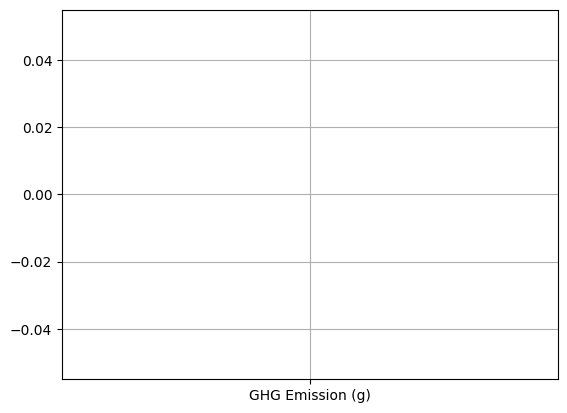

In [68]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [69]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [70]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [71]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

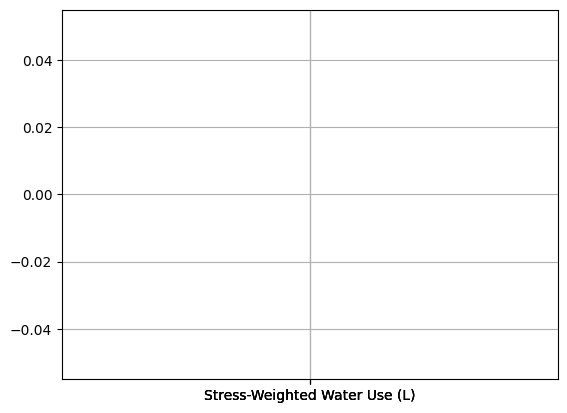

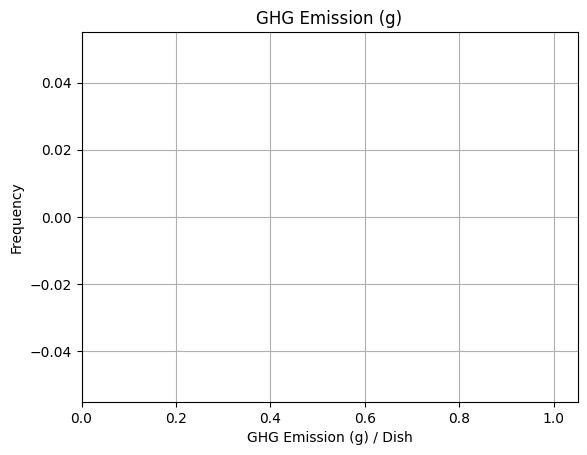

In [72]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

In [73]:
# Products.hist(column=['GHG Emission (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['GHG Emission (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['GHG Emission (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('GHG Emission (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'GHGe_100g.png')
# plt.show()

# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


Empty DataFrame
Columns: [ProdId, Description, SalesGroup, Weight (g), GHG Emission (g), N lost (g), Land Use (m^2), Freshwater Withdrawals (L), Stress-Weighted Water Use (L), GHG Emission (g) / 100g, N lost (g) / 100g, Freshwater Withdrawals (L) / 100g, Stress-Weighted Water Use (L) / 100g, Land Use (m^2) / 100g]
Index: []


In [74]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [75]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [76]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [77]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [78]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [79]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [80]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [81]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [82]:
# Products.to_csv('C:/Users/ENTER_HERE/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv', index = False)

OSError: Cannot save file into a non-existent directory: 'C:/Users/ENTER_HERE/CFFS-S23/CFFS-22-23/data/preprocessed'